# Baseline algorithms

For each learning problem, we will follow the same procedure. 

* How do we generate predictions for the target variable - we refer to this as the (learning) algorithm
* How do we estimate the parameters of the algorithm - estimated parameters and the algorithm is what we call the model
* How do we identify feature importance - so what are the most important variables for the target variable

## Linear Regression

For regression problems, the target variable is on a metric scale. When using linear regression, the aim is to predict values for $Y_i$, given a linear relationship between $Y_i$ and features $\boldsymbol{X}_i = (X_{i1}, ..., X_{in})$. The regression line is given by:

$$
f_{\boldsymbol{w}, b}(\boldsymbol{X}_i) = \boldsymbol{w}^T \boldsymbol{X}_{i} + b = w_1 \cdot X_{i1} + ... + w_n \cdot X_{in} + b
\label{linear_regression}\tag{1}
$$ 

where $\boldsymbol{w} \in \mathbb{R}^n, b \in \mathbb{R}$ are parameters that need to be estimated. In its simplest form with one feature, the regression line looks like:

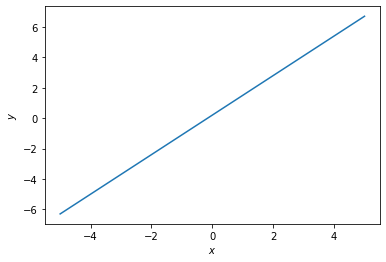

In [1]:
import matplotlib.pylab as plt
import numpy as np

x = np.linspace(-5, 5, 500)
y = 0.2 + 1.3 * x

plt.plot(x, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

However, the regression model is not as limited as it seems. It can be transformed into a model which is able to capture non-linear relationships as well, e.g, by transforming and adding features. For instance, features can be raised to higher powers which results in a polynomial regression. Adding $X^2$ to the univariate regression line, the regression is given by:

$$
f_{\boldsymbol{w}, b}(\boldsymbol{X}_i) = w_1 \cdot X_i + w_2 \cdot X_i^2 + b
$$

And looks like:

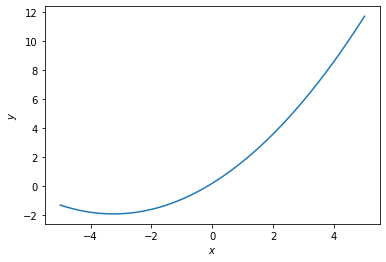

In [2]:
import matplotlib.pylab as plt
import numpy as np

x = np.linspace(-5, 5, 500)
y = 0.2 + 1.3 * x + 0.2 * x**2

plt.plot(x, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

### Estimation

This is solved by minimizing squared deviations between predictions according to Equation <a href="#mjx-eqn-linear_regression">1</a>  and observed values $y_i$. Thus, the function to be minimized by calibrating the model parameters is:

$$
L(\boldsymbol{w}^T, b) = \sum_{i = 1}^m \left( y_i - \boldsymbol{w}^T \boldsymbol{x}_i - b \right)^2
$$

This function is often called the **loss function** or the **cost function**. The optimization problem can be solved analytically. This means a closed form solution exists that returns parameter estimates if we insert observed data into a formula. In general you do not need to worry about the derivation of such solutions because you will estimate all models with Python packages. These packages either include a closed form solution, if it exists, or apply a numerical solution technique under the hood. Nevertheless, I think it is beneficial to get an idea how we would solve the optimization problem by ourselves. 

Let us take a look at the univariate linear regression model. To derive parameter estimates for a random sample $\lbrace y_i, x_i \rbrace_{i = 1}^m$ we minimize:

$$
L(w, b) = \sum_{i = 1}^m \left( y_i - w \cdot x_i - b \right)^2
$$

We follow basic calculus and derive stationary points as candidates for the minima. To do so, we need the gradient, i.e., partial derivatives of the loss function with respect to the parameters, set them to zero and search for the roots of these equations.

$$
\frac{\partial L(w, b)}{\partial w} = -2 \sum_{i = 1}^m \left( y_i - w \cdot x_i - b \right) \cdot x_i  \overset{!}{=} 0 
$$

$$
\frac{\partial L(w, b)}{\partial b} = -2 \sum_{i = 1}^m \left( y_i - w \cdot x_i - b \right)  \overset{!}{=} 0
$$

The solution of this equation system delivers estimators for $w$ and $b$:

$$
\hat{w} = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}
$$

$$
\hat{b} = \bar{y} - \hat{w} \bar{x}
$$

For completeness, it also needs to be analyzed whether the solution is a minimum, which is the case. 

This simply should show you that sometimes closed form solutions can be derived by simple mathematical methods. However, especially for more complex models this will not be the case. If we find ourselves in such a situation, the packages we use will use numerical solution techniques which in many cases use the information of the gradient. One of the most popular methods is the **gradient decent**. To understand how it works, we make it as easy as possible. Assume we only have one pair $(y = 3, x = 2)$. Our aim is to find the parameter $w$ which minimizes:

$$
L(w) = (y - w \cdot x)^2 = (3 - w \cdot 2)^2
$$

Visually, we want to find the slope of the regression line which starts in the origin and crosses the point as can be seen in the figure below.

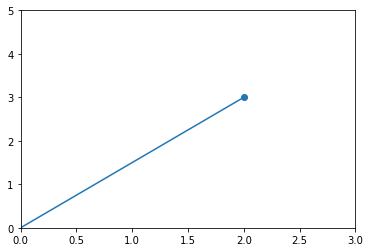

In [3]:
import matplotlib.pylab as plt
import numpy as np

plt.scatter(2, 3)
plt.plot([0, 2],[0, 3])
plt.xlim(0,3)
plt.ylim(0,5)
plt.show()

We can see that the solution is given by $w = 1.5$. But let us take a look how we would find this solution with the numerical method gradient decent. As the name suggests, gradient descent makes use of the gradient of the function with respect to unknown parameter. For our example the gradient is:

$$
\frac{\partial L(w)}{\partial w} = -4(3 - 2w) = 8 w - 12
$$

Let us take a look at the loss function, for values of $w \in [-1, 4]$:

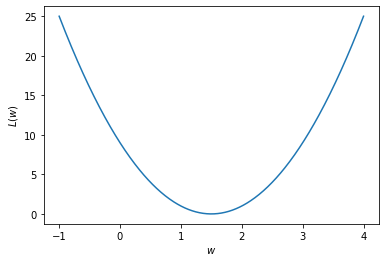

In [4]:
import matplotlib.pylab as plt
import numpy as np

w = np.linspace(-1, 4, 500)
plt.plot(w, (3 - w * 2)**2)
plt.xlabel(r'$w$')
plt.ylabel(r'$L(w)$')
plt.show()

The value of the derivative at a given value for $w$ is the slope of the tangent at this point. For instance, if we insert $w = 2$ the derivative equals $4$ or for $w = 0.5$ it results $-8$. This value is quite informative because it guides us the direction towards the next stationary point of a function, in our case towards the minimum. Let us take a look at the visualized derivatives in the figure below.

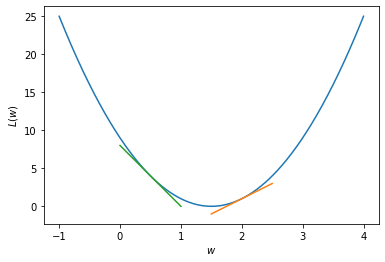

In [5]:
import matplotlib.pylab as plt
import numpy as np

def L(w): 
    return (3 - w * 2)**2

def slope(w): 
    return - 4 * (3 - w * 2)

   
w = np.linspace(-1, 4, 500)
plt.plot(w, L(w))
plt.plot([1.5, 2.5], [L(2) - slope(2) * 0.5, L(2) + slope(2) * 0.5])
plt.plot([0, 1], [L(0.5) - slope(0.5) * 0.5, L(0.5) + slope(0.5) * 0.5])
plt.xlabel(r'$w$')
plt.ylabel(r'$L(w)$')
plt.show()

If the derivative is negative we need to increase $w$ (move to the right on the number line) to approach the minimum and that we need to decrease $w$ (move to the left on the number line) if the derivative is positive. When we use the gradient descent method, we go a step into the direction which the gradient tells us. We decide how big the step is by setting the so called **learning rate** $\eta$. In order to determine a new value for $w$ we assign:

$$
w \leftarrow w - \eta \cdot \nabla L(w)
$$

Before the first step, we need to choose a value for $w$ at which we start our search for the stationary point. Typically, a random value is chosen for $w$. Let us assume, we set $w = 2$ and $\eta = 0.1$. The first step is:

$$
w \leftarrow 2 - 0.1 \cdot 4 = 2 - 0.4
$$

So after the first step, $w = 1.6$, in the next step we have:

$$
w \leftarrow 1.6 - 0.1 \cdot 0.8
$$

So after the second step, $w = 1.52$ which already gets close to the solution $w = 1.5$. Let us take a look how close we get after ten steps.

In [6]:
#function for the gradient
def grad(w):
    return 8 * w - 12

#learning rate
eta = 0.1
#starting value for w
w = 2

for _ in range(10):
    w = w - eta * grad(w)
    print(w)

1.6
1.52
1.504
1.5008
1.50016
1.500032
1.5000064
1.50000128
1.500000256
1.5000000512


You can see, this works. But be aware, choosing the learning rate can be a sensitive task. Setting it too high may lead to divergence which leads away from the solution and setting it too low, may result in a very long lasting estimation process. The learning is called a **hyperparameter**. In contrast to the model parameters, hyperparameters are set by the user and are not estimated. In practice, different values for hyperparameters are tested. We will come back to this at a later time. Now we know what the algorithm looks like and how the model parameters are estimated. Before we talk about the identification of important features, we will simulate data according to a linear regression model and estimate its parameters with the *scikit-learn* package. 

In [7]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#sample size of 1,000 data points
m = 1000

#parameter values
w = np.array([0.5, -1.0, 2.0])
b = 1.0

#randomly generate feature values for five feature variables 
np.random.seed(42)
X = np.random.normal(size = 3 * m).reshape(m, 3)

#generate values for the target and add some random error 
y = X.dot(w) + b + np.random.normal(size = m, scale = 0.2)

#fit the model
lin_reg = LinearRegression().fit(X, y)

#print estimated parameters for w
print(lin_reg.coef_)

#print estimated parameter for b
print(lin_reg.intercept_)

[ 0.50340502 -1.00531832  1.99237973]
0.9963949486055903


### Feature Importance

Lastly, we want to address the question how we can find out which features are most important for the target variable. This is rather easy for the linear regression model because once feature variables are on the same scale, the effect size, i.e., the size of the estimated parameter $w_i$ can be compared and used as an indicator to assess which feature is most relevant to the target variable. Behind this logic stands the idea of marginal effects and the question how much the prediction changes, if the specific feature changes by a (infinitesimal) small amount. Thus, to analyze the marginal impact of the $j$-th feature ($j = 1, ..., n$) for a given observation $i = 1, ..., m$ , we look at:

$$
\frac{\partial \hat{f}_{\boldsymbol{w}, b}(\boldsymbol{x}_{ij})}{\partial x_{ij}} = w_j
$$

If we want the importance of the $j$-th feature for all observations $i = 1, ..., m$, we can average individual effects which again results in the estimated parameter of the $j$-th feature:

$$
\frac{1}{m} \sum_{j = 1}^m \frac{\partial \hat{f}_{\boldsymbol{w}, b}(\boldsymbol{x}_{ij})}{\partial x_{ij}} = \frac{1}{m} \cdot m \cdot w_j = w_j
$$

To compare the importance among features, we can normalize the importance by:

$$
FI_{x_{j}} = \frac{w_j}{\sum_{j = 1}^{n} |w_j|}
$$

Due to the normalization, the importance of features can be interpreted as percentages. Let us make this more clear with the example above. For the linear regression model, we know that the average marginal effect of the change in the feature is given by its weight from the regression line. Accordingly, feature importance for our example is determined by:

In [8]:
feature_importance = lin_reg.coef_ / np.sum(np.abs(lin_reg.coef_))
for i, fi in enumerate(feature_importance):
    print(f'The relative importance of feature {i + 1} in % is: {fi * 100:2.2f}')

The relative importance of feature 1 in % is: 14.38
The relative importance of feature 2 in % is: -28.71
The relative importance of feature 3 in % is: 56.91


This shows that features with higher weights are more important. The intuition behind this definition is that features which cause higher deviations of the predicted target if they change are most important. As you can see, with the definition above, the sign indicates also the direction of the impact.

```{note}
Keep in mind that all features need to be brought to the same scale before the model parameters are estimated! This needs to be done to guarantee comparability. We will talk more about standardization in subsequent chapters.
```

## Logistic Regression

Logistic regression can be used for binary classification problems where the target variable has two possible outcomes. In this case, the target $Y_i$ is usually treated as a Bernoulli random variable where $Y_i = 1$ represents one of the two outcomes and $Y_i = 0$ represents the other possibility. One building block of the logistic regression model is the regression line from Equation <a href="#mjx-eqn-linear_regression">1</a>. However the outcome according to Equation <a href="#mjx-eqn-linear_regression">1</a> can take on any value in $\mathbb{R}$ and not just only $0$ and $1$ which we want to predict. To deal with this problem, the logistic regression model uses a transformation function which maps values from $\mathbb{R}$ to $[0, 1]$. The function which is used for this purpose is the **logistic** function which is also called the **sigmoid** function and is defined as $\sigma: \mathbb{R} \to [0, 1]$ with:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Please do not get confused with $\sigma$ as an abbreviation for the standard deviation and $\sigma()$ as a symbol for the sigmoid function. Using $\sigma()$ for the sigmoid function is conventional which is why we also do so.

This figure displays the sigmoid function:

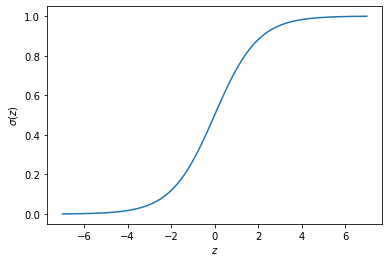

In [9]:
import matplotlib.pylab as plt
import numpy as np

def my_sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-7, 7, 500)
y = my_sigmoid(x)

plt.plot(x, y)
plt.xlabel(r'$z$')
plt.ylabel(r'$\sigma(z)$')
plt.show()

As you can see the sigmoid function does not return $0$ or $1$, but values in the interval $[0, 1]$. These values can be interpreted as probabilities, i.e., the probability $\pi_i$ for $P(Y_i = 1)$. Not let us bring together the linear regression line $Z_i = \boldsymbol{w}^T \boldsymbol{X}_{i}$ with the sigmoid function which results in the logistic regression algorithm:

$$
f_{\boldsymbol{w}, b}(\boldsymbol{X}_i) = \frac{1}{1 + e^{- \left( \boldsymbol{w}^T \boldsymbol{X}_i + b \right)}} = \frac{1}{1 + e^{- Z_i}}
$$

It is important to understand that the logistic regression model returns conditional probabilities for $P(Y_i = 1| \boldsymbol{X}_i)$. This means given parameter estimates and feature values, an individual probability for the target $Y_i$ is returned. Thus, the logistic regression model is not directly a classification model, it is a probability model whose output can be used for classification. This is done by setting a threshold $c$. If $f_{\boldsymbol{w}, b}(\boldsymbol{X}_i) > c$ we predict $\hat{Y}_i = 1$ and if $f_{\boldsymbol{w}, b}(\boldsymbol{X}_i) <= c$ we predict $\hat{Y}_i = 0$. $c$ needs to be chosen by us and does not necessarily need to be $0.5$. The value for $c$ should be set with respect to the specific classification problem.

### Estimation

Instead of minimizing squared deviations, we will maximize the likelihood of the data. The likelihood is given by the Bernoulli distribution. Let us denote $\pi_i$ as the probability $P(Y_i = 1| \boldsymbol{X}_i)$. If $Y_i = 1$, the likelihood of data point $i$ equals $\pi_i$, and, if  $Y_i = 0$, the likelihood of data point $i$ equals $\left( 1 - \pi_i \right)$. This can be subsumed for one data point by:

$$
\pi_i^{y_i} \cdot (1 - \pi_i)^{1 - y_i}
$$

Assuming conditional independence for all data points $y_i|\boldsymbol{x}_i$, the likelihood of the data sample can be calculated by:

$$
\mathcal{L}(\boldsymbol{w}, b) = \prod_{i = 1}^{m} \pi_i^{y_i} \cdot (1 - \pi_i)^{1 - y_i}
$$

and the log-likelihood is:

$$
\ln\left( \mathcal{L}(\boldsymbol{w}, b) \right) = \sum_{i = 1}^{m} y_i \ln(\pi_i) + (1 - y_i) \ln(1 - \pi_i)
$$

Note that instead of maximizing the log-likelihood, we can also minimize the negative log-likelihood such that:

$$
- \ln\left( \mathcal{L}(\boldsymbol{w}, b) \right) = - \sum_{i = 1}^{m} y_i \ln(\pi_i) + (1 - y_i) \ln(1 - \pi_i)
$$

would be the corresponding loss function of the logistic regression problem. In contrast to linear regression, no closed form solution exists and parameters of the logistic regression model need to be estimated by numerical optimization methods, e.g., gradient descent. The negative log-likelihood function is called **binary cross entropy** loss function.

### Feature Importance

We can take a look at two things, if we want to analyze which features are most important. (1) More conventional for the logistic regression model is to analyze the **log-odds**, (2) again we can derive the gradient of the prediction algorithm with respect to the features. Let us first take a look at the log-odds.

They are defined by the natural logarithm of the ratio of the probability $\pi_i$ and $(1 - \pi)$. With $Z = \boldsymbol{w}^T \boldsymbol{X}_i + b$ and are derived by:

$$
\ln \left( \frac{\pi_i}{1 - \pi_i} \right) = \ln \left( \frac{ \frac{1}{1 + e^{-Z}} }{ 1 - \frac{1}{1 + e^{-Z}}} \right) = \ln \left( \frac{ \frac{1}{1 + e^{-Z}} }{\frac{1 + e^{-Z} - 1}{1 + e^{-Z}}} \right) = \ln \left( \frac{ \frac{1}{1 + e^{-Z}} }{\frac{e^{-Z}}{1 + e^{-Z}}} \right) = \ln \left( \frac{1}{e^{-Z}} \right) = Z = \boldsymbol{w}^T \boldsymbol{X}_i + b
$$

This means that the impact of a change in one of the features on the log-odds follows a linear relationship. Assuming all features are standardized, the feature with the biggest weight $w_j$ is most important for the probability prediction of $\pi_i$ and $(1 - \pi_i)$, respectively. Note that we can analyze the impact of a change in the features directly on the probability prediction for $\pi_i$, however, the size of the weights must not be interpreted as for the linear regression model because the relationship between features and the probability prediction is not linear. This can be made clear when looking again at the sigmoid function in the figure above. Non-linear means that an increase in the feature differs regarding what the current value is. In the figure you can see that the value of the sigmoid function changes to a higher degree if $z$ changes in the area around the origin, while a change for very low or high values of $z$ hardly have an effect of the value for the sigmoid function. On the contrary, if a linear relationship exists, the dependent variable always changes to the same degree, no matter where the change of the independent variable occurs.

A more general way to analyze which is the most important feature can be conducted as already seen in the last subsection. We can make use of partial derivatives. For a given data point $\boldsymbol{x}_i = (x_{i1}, ..., x_{in})$, we can derive the partial derivative

$$
\frac{\partial \hat{f}_{\boldsymbol{w}, b}(\boldsymbol{x}_{ij})}{\partial x_{ij}} = \frac{\partial \hat{\pi}_i}{\partial x_{ij}}
$$

for the $j-$th feature. The idea is to ask the question how much changes the prediction for the probability $\pi_i$ if the value of the $j-$th feature marginally changes, given fixed parameters $\boldsymbol{w}, b$ which are usually estimated so $\hat{\boldsymbol{w}}, \hat{b}$. As we are more interested in a general statement, we derive this sensitivity for every data point and average for the $j-$th feature over all observations $i = 1, ..., m$. For a better comparison, we normalize the result of the average sensitivity such that the sum over absolute values sums up to one, i.e., we can interpret feature importance in relative terms. Accordingly, feature importance for the logistic regression can be derived by:

$$
FI_{x_{j}} = \frac{1}{C} \frac{1}{m} \sum_{i = 1}^m \frac{\partial \hat{\pi}_i}{\partial x_{ij}}
$$

where $C$ ensures $\sum_{j = 1}^n |FI_{x_{j}}| = 1$. Partial derivatives can be solved by hand for the logistic regression model, but this should not be of a real concern for you, because even if you can not derive it, we will calculate derivatives using Python packages which apply automatic differentiation. Nevertheless, let us quickly take a look, how we can calculate $\frac{\partial \hat{\pi}_i}{\partial x_{ij}}$. 

The derivative of the sigmoid function with respect to its argument $z$ is given by:

$$
\frac{\partial \sigma}{\partial z} = \sigma(z)\left(1 - \sigma(z)\right)
$$

If you are interested how we derive this, take a look here:


$$\begin{align}
\frac{\partial \sigma}{\partial z} & = & \frac{\partial \left(1 + e^{-z}\right)^{-1} }{\partial z} & \overset{\text{chain rule}}{=} &  -1 \cdot \left(1 + e^{-z}\right)^{-2} e^{-z} (-1) & = & &\\
 & = & \frac{e^{-z}}{\left(1 + e^{-z}\right)^{2}} & \overset{\text{rearrange}}{=} & \frac{e^{-z}}{\left(1 + e^{-z}\right)\left(1 + e^{-z}\right)} & = & \frac{1}{\left(1 + e^{-z}\right)}\frac{e^{-z}}{\left(1 + e^{-z}\right)} & \overset{\text{add and subtract 1}}{=} \\
 & = & \frac{1}{\left(1 + e^{-z}\right)}\frac{1 + e^{-z} - 1}{\left(1 + e^{-z}\right)} & = & \frac{1}{\left(1 + e^{-z}\right)}\left(1 - \frac{1}{\left(1 + e^{-z}\right)} \right) & = & \sigma(z)\left(1 - \sigma(z)\right) & & 
\end{align}
$$

For our model we do not need to differentiate with respect to $z$ but with respect to $x_{ij}$, where $z_i = \boldsymbol{w}^T \boldsymbol{x}_t + b$. So we are in need of:

$$
\frac{\partial \hat{\pi}_i}{\partial x_{ij}}
$$

Fortunately, with the chain rule, this can be easily derived by means of the derivative of the sigmoid function, i.e.:

$$
\frac{\partial \hat{\pi}_i}{\partial x_{ij}} = \frac{\partial \hat{\pi}_i}{\partial \sigma{\hat{z}_i}}  \frac{\partial \hat{z}_i}{\partial x_{ij}} = \sigma(\hat{z}_i)\left(\sigma(1 - \hat{z}_i)\right) \hat{w}_j
$$

To better understand the model, estimation and the concept of feature importance take a look at the example in the code below.

In [10]:
import jax.numpy as jnp
from jax import grad
import numpy as np
from sklearn.linear_model import LogisticRegression


#sample size of 1,000 data points
m = 1000

#parameter values
w = np.array([1.2, -0.7, 0.2])
b = 0.5

#randomly generate feature values for three feature variables 
np.random.seed(42)
X = np.random.normal(size = 3 * m).reshape(m, 3)

#now we generate values for the probabilities of P(Y_i = 1) 
z = X.dot(w) + b 
pi = 1 / (1 + np.exp(-z))

#draw random Bernoulli numbers according to these probabilities
y = np.random.binomial(n = 1, p = pi)

#fit the model
log_reg = LogisticRegression().fit(X, y)

#print estimated parameters for w
print(log_reg.coef_)

#print estimated parameter for b
print(log_reg.intercept_)

[[ 1.22911965 -0.91260803  0.13970364]]
[0.60558187]


In [11]:
#now to understand how we would derive feature importance
#we will not manually calculate derivatives, instead we
#make use of the jax package which automatically derives the gradient for us
#via autodifferentiation

#therefore we need to import the jax-specific numpy package and the gradient function
import jax.numpy as jnp
from jax import grad

#we define our own sigmoid function
def sigmoid(z):
    return 1 / (1 + jnp.exp(-z))

#and the function which generates prediction with the estimated model parameters from the
#code block above
def prediction(x):
    z = x.dot(w) + b
    return sigmoid(z)

#the gradient for the prediction function with respect is automatically derived with
#this statement; Note: this is the collection of partial derivatives of \pi_i with respect to x_{ij}
grad_prediction = grad(prediction)

#we just convert the format of feature variables to make gradient calculation work
X = jnp.array(X)

#use the estimated model parameters
w = jnp.array(log_reg.coef_[0])
b = log_reg.intercept_[0]

#an example for partial derivatives with respect to x_{11}, x_{12} and x_{13} 
print('An example for partial derivatives of the first observaion:')
print(grad_prediction(X[0]))

#derive the partial derivatives for each observation
partial_derivatives = np.array([grad_prediction(x) for x in X])

#calculate the average importance for feature j over all observations i
average_partiale_derivatives = np.mean(partial_derivatives, axis = 0)

#determine the normalizing constant which ensures that absolute feature importances sum up to 1
C = np.sum(np.abs(average_partiale_derivatives))

#calculate feature importances
feature_importance = average_partiale_derivatives / C

for i, fi in enumerate(feature_importance):
    print(f'The relative importance of feature {i + 1} in % is: {fi * 100:2.2f}')

An example for partial derivatives of the first observaion:
[ 0.19118567 -0.14195329  0.02173046]


The relative importance of feature 1 in % is: 53.87
The relative importance of feature 2 in % is: -40.00
The relative importance of feature 3 in % is: 6.12


## Multi-Classification Regression

If the task is to analyze a categorical target variable with more than two outcomes, we have multiple options. Traditional regression methods like multinomial or ordinary regression or more flexible approaches like neural networks. We will not discuss these methods in detail at this point, however, simply try to apply the idea which has been used to adjust the linear regression algorithm to a binary target variable. As before if $Y_i$ has multiple categories we can not make predictions by Equation <a href="#mjx-eqn-linear_regression">1</a> which results in arbitrary values in $\mathbb{R}$. For the binary classification, the regression line was transformed to return probabilities for the categories. As we had only two categories, it was enough to define the probability for $P(Y_i = 1)$ because this also defines the probability $P(Y_i = 0) = 1 - P(Y_i = 1)$. If $Y_i$ has more than two categories, this idea needs to be extended, i.e., with $K$ categories at least $K-1$ probabilities need to be determined or we simply model a probability for each category. Given $n$ feature variables we could set up an equation system in which we use one equation for each category $k = 1, ..., K$:

$$
\begin{align}
Z_1 & = w_{11} X_{i1} + w_{12} X_{i2} + ... + w_{1n} X_{in} + b_1 \\
Z_2 & = w_{21} X_{i1} + w_{22} X_{i2} + ... + w_{2n} X_{in} + b_2 \\
\vdots & = \vdots \\
Z_K & = w_{K1} X_{i3} + w_{K2} X_{i3} + ... + w_{Kn} X_{in} + b_3 \\
\end{align}
$$

For convenience, we use matrix notation

$$
\boldsymbol{Z}_i = \boldsymbol{X}_i^T W + \boldsymbol{b}
$$

with $\boldsymbol{Z}_i = (Z_{1i}, ..., Z_{Ki}) \in \mathbb{R}^K$, $\boldsymbol{X}_i = (X_{i1}, ..., X_{in}) \in \mathbb{R}^n$, $W \in \mathbb{R}^{n \times K}$ and $\boldsymbol{b} \in \mathbb{R}^K$. 

Note that for each category, feature values are the same, but the weights and biases differ. For the equations above $Z_k$ can have arbitrary values and we want probabilities for $P(Y_i = k) = \pi_{ki}, k = 1, ..., K$. As before we can make use of a transformation function which fits our need, i.e., the **softmax** function. It is defined by:

$$
\pi_{ki} = \frac{e^{Z_k}}{\sum_j e^{Z_j}}
$$

Maybe it does not look as intuitive as it is. For each category, we want a probability which by definition is in $[0, 1]$. In the equation system above each $Z_k$ is in $\mathbb{R}$. By making use of the $e$-function each $e^{Z_k}$ is in $(0, \infty)$, which means we fulfill the first requirement for a probability, $\pi_{ki} \geq 0$. Now, to make sure that the sum of probabilities for disjoint events sums up to one, we need a normalization for each $e^{Z_k}$. This is solved by summing over all $e^{Z_k}$ values which we denote by $\sum_j e^{z_j}$. Assume, we have three categories and three values $z_1 = -1.0, z_2 = 0.7, z_3 = 0.2$. Using the $e$-function, this leads to $e^{z_1} = 0.3679, e^{z_2} = 2.0138, e^{z_3} = 1.2214$, all values are now greater than $0$. To determine the normalization, we add up: $e^{z_1} + e^{z_2} + e^{z_3} = 0.3679 + 2.0138 + 1.2214 = 3.6031$. Using this in the denominator, it results:

$$
\begin{align}
\pi_{1i} = \frac{0.3679}{3.6031} = 0.1021 \\
\pi_{2i} = \frac{2.0138}{3.6031} = 0.5589 \\
\pi_{3i} = \frac{1.2214}{3.6031} = 0.3390 \\
\end{align}
$$

As you can see, it holds that: $\sum_k \pi_{ki} = 1$. 

Now you know how the probability  for each observation belonging to category $k$ can be determined for a given observation $\boldsymbol{x}_i$, once model parameters are estimated. 

```{caution}
Be aware that estimation and feature importance for this type of multi-classification model is already rather sophisticated and beyond expectations regarding your current knowledge of these methods. However, for completeness, we illustrate them below and you are welcome to get an idea how it works. Just do not become discouraged if you do not understand it holistically.
```

### Estimation

In analogy to the logistic regression, we can estimate parameters by maximizing the likelihood of a categorical distribution. The likelihood of an observation $Y_i = y_i = k$ equals the probability for category $k$, i.e, $\pi_{ki}$. Thus, for a data sample, the joint likelihood is given by:

$$
\mathcal{L}(W, b) = \prod_{i = 1}^m \prod_{k = 1}^K  \pi_{ki}^{[y_i = k]}
$$

Basically, this is the product of categorical probabilities of categories which are observed. To make notation easier, let us define $Y_{ki}$ which is equal to $1$ if $Y_i = k$ and $0$ otherwise. Thus, the likelihood is:

$$
\mathcal{L}(W, b) = \prod_{i = 1}^m \pi_{ki}^{y_{ki}}
$$

and the log-likelihood is given by:

$$
\ln \left( \mathcal{L}(W, b) \right) = \sum_{i = 1}^m y_{ki} \ln \left( \pi_{ki} \right)
$$

Typically, optimization problems are presented as minimization problems. Instead of maximizing the log-likelihood, one minimizes:

$$
- \ln \left( \mathcal{L}(W, b) \right) = - \sum_{i = 1}^m y_{ki} \ln \left( \pi_{ki} \right)
$$

which is called the **categorical crossentropy** function. As before, parameters can be estimated by gradient descent, for which several Python packages can be used.

### Feature Importance

The idea to derive feature importance by determining marginal sensitivities of predictions with respect to changes in features can be also used for the multi-classification model. However, we need to determine marginal sensitivities for each probability prediction. In concrete, our model consists of a system with $K$ functions which are used to predict probabilities for each category and, hereby, make use of $n$ features as input. In mathematical notation this is a mapping $\mathbb{R}^n \to [0,1]^K$ with $\boldsymbol{X}_i \to \boldsymbol{f} \left(\boldsymbol{X}_i^T W + \boldsymbol{b}\right) $. $\boldsymbol{f}$ represents the softmax function which is applied to each category, i.e., $\pi_{1i} = f_1(\boldsymbol{X}_i^T \boldsymbol{w}_{\cdot 1} + b_1), ..., \pi_{Ki} = f_K(\boldsymbol{X}_i^T \boldsymbol{w}_{\cdot K} + b_K)$. Building derivatives of each function $f_1, ..., f_k$ with respect to each feature $X_{i1}, ..., X_{in}$ is stored in the **Jabobian** matrix.

$$
J_f(\boldsymbol{X}_i) = 
\left(
\begin{align}
\frac{\partial f_1(\boldsymbol{X}_i)}{\partial X_{i1}} & & ... & & \frac{\partial f_1(\boldsymbol{X}_i)}{\partial X_{in}} \\
\vdots & & \vdots & & \vdots \\
\frac{\partial f_K(\boldsymbol{X}_i)}{\partial X_{i1}} & & ... & & \frac{\partial f_K(\boldsymbol{X}_i)}{\partial X_{in}} \\
\end{align}
\right)
$$

This can be done with another Python package. In this context, it is important to understand that we derive the Jacobian for every observation $\boldsymbol{x}_i$ and, as before, average over ever entry $k,n$ to estimate global importance of feature $j$ with respect to probability of category $k$.

$$
FI_{x_{kj}} = \frac{1}{C_k} \frac{1}{m} \sum_{i = 1}^m \frac{\partial \hat{\pi}_{ki}}{\partial x_{ij}}
$$

where $C_k$ ensures $\sum_{j = 1}^n |FI_{x_{kj}}| = 1$, such that importances sum up to one for each category $k$.

In [12]:
import numpy as np

def softmax(z):
    return [np.exp(zk) / np.sum(np.exp(z)) for zk in z]

#simulate a random data sample

#sample size of 1,000 data points
m = 1000

#parameter values
np.random.seed(42)
W = np.random.normal(size = 3 * 3).reshape(3, 3)
b = np.random.normal(size = 3)

#randomly generate feature values for three feature variables 
X = np.random.normal(size = 3 * m).reshape(m, 3)

#now we generate values for the probabilities of P(Y_i = 1), P(Y_i = 2), P(Y_i = 3) 
Z = X.dot(W) + b
pi = [softmax(z_i) for z_i in Z]

#draw random observations for Y_i, given probabilities pi_i
Y = [np.random.choice([1,2,3], size = 1, replace = False, p = p_i)[0] for p_i in pi]

In [13]:
import jax.numpy as jnp
from jax.nn import softmax
from jax import grad

#super slow and very quick and dirty implementation

#function for making probability predictions
def predict(weights, bias, X):
    return softmax(jnp.dot(X, weights) + bias)

#function
def cat_crossentropy(weights, bias, X):
    pi_est = predict(weights, bias, X)
    return -jnp.sum(jnp.array([jnp.log(pi_est[i][y-1]) for i, y in enumerate(Y)]))

#Gradient with respect to weights and bias
gradient = grad(cat_crossentropy, argnums = (0, 1))

#initialize random weights and bias
np.random.seed(42)
W_est = jnp.array(np.random.normal(size = 3*3).reshape(3, 3))
b_est = jnp.array([0.0, 0.0, 0.0])

#learning rate for gradient descent
lr = 0.001
#starting value of the crossentropy
crossentropy = cat_crossentropy(W_est, b_est, X)

#in a loop, do ...
for _ in range(10):
    #derive the current value of the gradient
    W_grad, b_grad = gradient(W_est, b_est, X)
    
    #update parameters by gradient descent step
    W_est -= lr * W_grad
    b_est -= lr * b_grad

    #current cross_entropy
    crossentropy_tmp = cat_crossentropy(W_est, b_est, X)
    
    #if crossentropy increases, we overstepped the local minimum, then stop
    if crossentropy_tmp > crossentropy:
        break
    crossentropy = crossentropy_tmp
    print(f'The current loss is: {crossentropy:2.2f}')
    
print('This is the original weights matrix:')
print(W)
print('-'*60)
print('This is the estimated weights matrix:')
print(W_est)
print('-'*60)
print('These are original bias values:')
print(b)
print('-'*60)
print('These are estimated bias values:')
print(b_est)
print(' ')
print('...not too bad!')

The current loss is: 701.34


The current loss is: 683.80


The current loss is: 673.41


The current loss is: 667.12


The current loss is: 663.23


In [ ]:
import jax.numpy as jnp
from jax.nn import softmax
from jax import jacfwd
import numpy as np

#now we switch sides as we are interested in partial derivatives
#of each probability prediction with respect to each feature

#we define a prediction just to clearly separate it from the previous function
def prediction(x):
    return softmax(x.dot(W_est) + b_est)

#function to derive the jacobian
prediction_jacobian = jacfwd(prediction)

#placeholders for partial derivatives with respect to each feature for each probabilty prediction
pi_one_derivatives = []
pi_two_derivatives = []
pi_three_derivatives = []

#for each data point get the jacobian and save partial derivatives
#for each prediction in their placeholders
for x in X:
    jacobian_tmp = prediction_jacobian(x)
    pi_one_derivatives.append(jacobian_tmp[0])
    pi_two_derivatives.append(jacobian_tmp[1])
    pi_three_derivatives.append(jacobian_tmp[2])

#determine average feature importance for probability predictions P(Y_i = 1)
feature_importance_one = np.mean(np.array(pi_one_derivatives), axis = 0)
feature_importance_one = [f / np.sum(np.abs(feature_importance_one)) for f in feature_importance_one]

#determine average feature importance for probability predictions P(Y_i = 2)
feature_importance_two = np.mean(np.array(pi_two_derivatives), axis = 0)
feature_importance_two = [f / np.sum(np.abs(feature_importance_two)) for f in feature_importance_two]

#determine average feature importance for probability predictions P(Y_i = 3)
feature_importance_three = np.mean(np.array(pi_three_derivatives), axis = 0)
feature_importance_three = [f / np.sum(np.abs(feature_importance_three)) for f in feature_importance_three]

print('Feature importance for the probability of P(Y_i = 1)')
print('-'*60)

for i, fi in enumerate(feature_importance_one):
    print(f'The relative importance of feature {i + 1} in % is: {fi * 100:2.2f}')

print('-'*60)
print('')

print('Feature importance for the probability of P(Y_i = 2)')
print('-'*60)

for i, fi in enumerate(feature_importance_two):
    print(f'The relative importance of feature {i + 1} in % is: {fi * 100:2.2f}')

print('-'*60)
print('')

print('Feature importance for the probability of P(Y_i = 3)')
print('-'*60)

for i, fi in enumerate(feature_importance_three):
    print(f'The relative importance of feature {i + 1} in % is: {fi * 100:2.2f}')

print('-'*60)
print('')

print('...results make sense when looking at parameter weights!\n')
print(W_est)
print('')
print('...however impact sizes for categories Y_i = 2 and Y_i = 3 seem to be a little mixed up!')

## Summary of Baseline Algorithms

What can we learn from these algorithms to generate a general understanding of supervised learning models? You may already have noticed a repeating pattern when reading each subsection. Every algorithm has an affine function, $\boldsymbol{w}^T \boldsymbol{X}_{i} + b$, as a building block. For every algorithm, the affine function gets transformed with another function $g$. The purpose of this transformation is to bring the predicted variable on the scale which is needed for the learning problem, i.e., the scale of the target variable. Once the algorithm is specified, model parameters are estimated by minimizing a loss function. The loss function is chosen according to the learning problem. The table below summarizes this structure of the models:

<br>

<table style="width:80%;">
    <colgroup>
       <col span="1" style="width: 10%;" >
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>

<tbody>
  <tr>
      <th> Problem </th>  <th> Algorithm </th> <th> Transformation </th> <th> Loss function </th>
  </tr>  
  <tr>
      <td> Regression </td>
      <td> $f_{\boldsymbol{w}, b}(\boldsymbol{X}_i) = \boldsymbol{w}^T \boldsymbol{X}_{i} + b$ </td>
      <td> $g: \mathbb{R} \to \mathbb{R}$, $g(z) = z$ </td>
      <td> $L(\boldsymbol{w}^T, b)= \sum_{i = 1}^m \left( y_i - f_{\boldsymbol{w}, b}(\boldsymbol{x}_i) \right)^2$ </td>
  </tr>  
  <tr>
      <td> Classification </td>
      <td> $\pi_i = f_{\boldsymbol{w}, b}(\boldsymbol{X}_i) = \frac{1}{1 + e^{- \left( \boldsymbol{w}^T \boldsymbol{X}_i + b \right)}}$ </td>
      <td> $f: \mathbb{R} \to [0,1]$, $g(z) = \frac{1}{1 + e^{-z}}$ </td>
      <td> $L(\boldsymbol{w}^T, b) = - \sum_{i = 1}^{m} y_i \ln(\pi_i) + (1 - y_i) \ln(1 - \pi_i)$ </td>
  </tr>  
  <tr>
      <td> Multi-classification </td>
      <td> $\pi_{ki} = f_{\boldsymbol{w_k}, b_k}(\boldsymbol{X}_i) = \frac{e^{\boldsymbol{w_k}^T \boldsymbol{X}_i + b_k}}{\sum_j e^{\boldsymbol{w_j}^T \boldsymbol{X}_i + b_j}}$ </td>
      <td> $f: \mathbb{R} \to [0,1]^K$, $g_k(z) = \frac{e^{z_k}}{\sum_j e^{z_j}}$ </td>
      <td> $L(\boldsymbol{W}, \boldsymbol{b}) = - \sum_{i = 1}^m y_{ki} \ln \left( \pi_{ki} \right)$ </td>
  </tr>  
    </tbody>
</table>